In [48]:
import pandas as pd
import numpy as np

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, pandas_udf, lit, to_date, when, array
from pyspark.sql.types import IntegerType

from pyspark.sql import functions as F

import networkx as nx

SparkDataFrame = pyspark.sql.dataframe.DataFrame


In [12]:
matriz_enlaces = pd.read_csv("/datos/EpiTeam/redes/year=2020/month=02/day=04/matrices_bloques/matriz_enlaces.csv")

In [13]:
matriz_enlaces = matriz_enlaces.drop(["Unnamed: 0"], axis=1)

In [14]:
matriz_enlaces

,bloque_a,0000000000000,0900200010010,0900200010025,090020001003A,0900200010044,0900200010097,090020001010A,0900200010114,0900200010129,...,1512200011120,1512200011135,1512200011154,1512200011192,1512200011205,1512500010016,1512500010020,151250001004A,1512500070054,1512500070069
0,0000000000000,3503337721,473512,177567,532701,887835,177567,414323,1006213,1183780,...,59189,355134,236756,59189,59189,355134,177567,177567,236756,177567
1,0900200010010,473512,64,24,72,120,24,56,136,160,...,8,48,32,8,8,48,24,24,32,24
2,0900200010025,177567,24,9,27,45,9,21,51,60,...,3,18,12,3,3,18,9,9,12,9
3,090020001003A,532701,72,27,81,135,27,63,153,180,...,9,54,36,9,9,54,27,27,36,27
4,0900200010044,887835,120,45,135,225,45,105,255,300,...,15,90,60,15,15,90,45,45,60,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6308,1512500010016,355134,48,18,54,90,18,42,102,120,...,6,36,24,6,6,36,18,18,24,18
6309,1512500010020,177567,24,9,27,45,9,21,51,60,...,3,18,12,3,3,18,9,9,12,9
6310,151250001004A,177567,24,9,27,45,9,21,51,60,...,3,18,12,3,3,18,9,9,12,9
6311,1512500070054,236756,32,12,36,60,12,28,68,80,...,4,24,16,4,4,24,12,12,16,12


In [15]:
matriz_enlaces_info = matriz_enlaces.drop(columns=["bloque_a", "0000000000000"]).tail(-1)

In [16]:
#matriz_enlaces_final = matriz_enlaces.drop(columns=["bloque_a"]).to_numpy()
matriz_enlaces_final = matriz_enlaces_info.to_numpy()

In [17]:
matriz_enlaces_info

,0900200010010,0900200010025,090020001003A,0900200010044,0900200010097,090020001010A,0900200010114,0900200010129,0900200010133,0900200010148,...,1512200011120,1512200011135,1512200011154,1512200011192,1512200011205,1512500010016,1512500010020,151250001004A,1512500070054,1512500070069
1,64,24,72,120,24,56,136,160,128,80,...,8,48,32,8,8,48,24,24,32,24
2,24,9,27,45,9,21,51,60,48,30,...,3,18,12,3,3,18,9,9,12,9
3,72,27,81,135,27,63,153,180,144,90,...,9,54,36,9,9,54,27,27,36,27
4,120,45,135,225,45,105,255,300,240,150,...,15,90,60,15,15,90,45,45,60,45
5,24,9,27,45,9,21,51,60,48,30,...,3,18,12,3,3,18,9,9,12,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6308,48,18,54,90,18,42,102,120,96,60,...,6,36,24,6,6,36,18,18,24,18
6309,24,9,27,45,9,21,51,60,48,30,...,3,18,12,3,3,18,9,9,12,9
6310,24,9,27,45,9,21,51,60,48,30,...,3,18,12,3,3,18,9,9,12,9
6311,32,12,36,60,12,28,68,80,64,40,...,4,24,16,4,4,24,12,12,16,12


In [18]:
matriz_obs = pd.read_csv("/datos/EpiTeam/redes/year=2020/month=02/day=04/matrices_bloques/matriz_obs.csv")

In [19]:
matriz_obs = matriz_obs.drop(["Unnamed: 0"], axis=1)

In [20]:
matriz_obs

,bloque_a,0000000000000,0900200010010,0900200010025,090020001003A,0900200010044,0900200010097,090020001010A,0900200010114,0900200010129,...,1512200011120,1512200011135,1512200011154,1512200011192,1512200011205,1512500010016,1512500010020,151250001004A,1512500070054,1512500070069
0,0000000000000,46444,5,0,1,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0900200010010,5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0900200010025,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,090020001003A,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0900200010044,7,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6308,1512500010016,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6309,1512500010020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6310,151250001004A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6311,1512500070054,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
matriz_obs_info = matriz_obs.drop(columns=["bloque_a", "0000000000000"]).tail(-1)

In [22]:
#matriz_obs_final = matriz_obs.drop(columns=["bloque_a"]).to_numpy()
matriz_obs_final = matriz_obs_info.to_numpy()

In [23]:
matriz_obs_info

,0900200010010,0900200010025,090020001003A,0900200010044,0900200010097,090020001010A,0900200010114,0900200010129,0900200010133,0900200010148,...,1512200011120,1512200011135,1512200011154,1512200011192,1512200011205,1512500010016,1512500010020,151250001004A,1512500070054,1512500070069
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
sizes = pd.read_csv("/datos/EpiTeam/redes/year=2020/month=02/day=04/matrices_bloques/sizes.csv")

In [25]:
sizes

,Unnamed: 0,home_ageb,cardinalidad
0,0,0000000000000,59189
1,1,0900200010010,8
2,2,0900200010025,3
3,3,090020001003A,9
4,4,0900200010044,15
...,...,...,...
6308,6308,1512500010016,6
6309,6309,1512500010020,3
6310,6310,151250001004A,3
6311,6311,1512500070054,4


In [17]:
sizes_final = list(sizes["cardinalidad"])

In [26]:
matriz_enlaces_final.shape

(6312, 6312)

In [27]:
matriz_obs_final.shape

(6312, 6312)

In [28]:
matriz_probs = matriz_obs_final / matriz_enlaces_final

matriz_probs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
np.argwhere(np.isnan(matriz_probs))

array([], shape=(0, 2), dtype=int64)

In [30]:
def escalamiento(df: SparkDataFrame, tam_final: int) -> list[int]:
    N = df.select(F.sum("cardinalidad").alias("whole_sum")).collect()[0]["whole_sum"]

    out = df.withColumn("escalado", ( col("cardinalidad") * lit(tam_final) ) / lit(N) ) \
        .withColumn("ceil", F.ceil("escalado")) \
        .withColumn("rounded", F.ceil(F.round("escalado")))

    pandas_aux = out.toPandas()
    scale_acc = list(pandas_aux["rounded"])

    for index, row in pandas_aux.iterrows():
        if row["ceil"] > 0 and scale_acc[index] == 0 :
            scale_acc[index] = 1
    
        if sum(scale_acc) == 10000:
            break

    only_ageb_tags = list(pandas_aux["home_ageb"])

    return scale_acc, list(zip(only_ageb_tags, scale_acc))

In [31]:
spark = SparkSession.builder \
            .config("spark.jars", "./utils/postgresql-42.5.1.jar") \
            .master("local[40]") \
            .config("spark.driver.memory", "50g") \
            .config("spark.executor.memory", "50g") \
            .appName("Generacion de Redes") \
            .getOrCreate()

23/04/17 18:31:57 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/04/17 18:31:57 WARN DependencyUtils: Local jar /datos/home/hmora/network-gen-pipeline/notebooks/utils/postgresql-42.5.1.jar does not exist, skipping.
23/04/17 18:31:57 INFO SparkContext: Running Spark version 3.3.0
23/04/17 18:31:57 INFO ResourceUtils: ==============================================================
23/04/17 18:31:57 INFO ResourceUtils: No custom resources configured for spark.driver.
23/04/17 18:31:57 INFO ResourceUtils: ==============================================================
23/04/17 18:31:57 INFO SparkContext: Submitted application: Generacion de Redes
23/04/17 18:31:57 INFO ResourceProfile: Default ResourceProfile created, executor resources: Map(cores -> name: cores, amount: 1, script: , vendor: , memory -> name: memory, amount: 51200, script: , vendor: , offHeap -> name: offHeap, amount: 0, script: , vendor: ), tas

In [36]:
sizes_df = spark.createDataFrame(sizes.drop(["Unnamed: 0"], axis=1).tail(-1))

/home/hmora/anaconda3/envs/pyspark_env/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/home/hmora/anaconda3/envs/pyspark_env/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [37]:
esc, zipped = escalamiento(sizes_df, 10000)
assert sum(esc) == 10000

23/04/17 18:35:39 INFO CodeGenerator: Code generated in 114.952467 ms
23/04/17 18:35:39 INFO DAGScheduler: Registering RDD 16 (collect at /tmp/ipykernel_2985995/2242613360.py:2) as input to shuffle 0
23/04/17 18:35:39 INFO DAGScheduler: Got map stage job 0 (collect at /tmp/ipykernel_2985995/2242613360.py:2) with 40 output partitions
23/04/17 18:35:39 INFO DAGScheduler: Final stage: ShuffleMapStage 0 (collect at /tmp/ipykernel_2985995/2242613360.py:2)
23/04/17 18:35:39 INFO DAGScheduler: Parents of final stage: List()
23/04/17 18:35:39 INFO DAGScheduler: Missing parents: List()
23/04/17 18:35:39 INFO DAGScheduler: Submitting ShuffleMapStage 0 (MapPartitionsRDD[16] at collect at /tmp/ipykernel_2985995/2242613360.py:2), which has no missing parents
23/04/17 18:35:39 INFO MemoryStore: Block broadcast_0 stored as values in memory (estimated size 17.0 KiB, free 29.8 GiB)
23/04/17 18:35:39 INFO MemoryStore: Block broadcast_0_piece0 stored as bytes in memory (estimated size 8.6 KiB, free 29.8 

23/04/17 18:35:40 INFO PythonRunner: Times: total = 762, boot = 682, init = 79, finish = 1
23/04/17 18:35:40 INFO PythonRunner: Times: total = 747, boot = 676, init = 71, finish = 0
23/04/17 18:35:40 INFO PythonRunner: Times: total = 772, boot = 699, init = 72, finish = 1
23/04/17 18:35:40 INFO PythonRunner: Times: total = 777, boot = 693, init = 84, finish = 0
23/04/17 18:35:40 INFO PythonRunner: Times: total = 778, boot = 704, init = 73, finish = 1
23/04/17 18:35:40 INFO PythonRunner: Times: total = 777, boot = 688, init = 88, finish = 1
23/04/17 18:35:40 INFO PythonRunner: Times: total = 793, boot = 716, init = 76, finish = 1
23/04/17 18:35:40 INFO PythonRunner: Times: total = 791, boot = 710, init = 80, finish = 1
23/04/17 18:35:40 INFO PythonRunner: Times: total = 793, boot = 671, init = 121, finish = 1
23/04/17 18:35:40 INFO PythonRunner: Times: total = 796, boot = 725, init = 70, finish = 1
23/04/17 18:35:40 INFO PythonRunner: Times: total = 813, boot = 731, init = 81, finish = 

23/04/17 18:35:41 INFO DAGScheduler: Got job 1 (collect at /tmp/ipykernel_2985995/2242613360.py:2) with 1 output partitions
23/04/17 18:35:41 INFO DAGScheduler: Final stage: ResultStage 2 (collect at /tmp/ipykernel_2985995/2242613360.py:2)
23/04/17 18:35:41 INFO DAGScheduler: Parents of final stage: List(ShuffleMapStage 1)
23/04/17 18:35:41 INFO DAGScheduler: Missing parents: List()
23/04/17 18:35:41 INFO DAGScheduler: Submitting ResultStage 2 (MapPartitionsRDD[19] at collect at /tmp/ipykernel_2985995/2242613360.py:2), which has no missing parents
23/04/17 18:35:41 INFO MemoryStore: Block broadcast_1 stored as values in memory (estimated size 12.3 KiB, free 29.8 GiB)
23/04/17 18:35:41 INFO MemoryStore: Block broadcast_1_piece0 stored as bytes in memory (estimated size 5.9 KiB, free 29.8 GiB)
23/04/17 18:35:41 INFO BlockManagerInfo: Added broadcast_1_piece0 in memory on sefirot.inmegen.gob.mx:36777 (size: 5.9 KiB, free: 29.8 GiB)
23/04/17 18:35:41 INFO SparkContext: Created broadcast 1 

23/04/17 18:35:41 INFO CodeGenerator: Code generated in 19.688609 ms
23/04/17 18:35:41 INFO SparkContext: Starting job: toPandas at /tmp/ipykernel_2985995/2242613360.py:8
23/04/17 18:35:41 INFO DAGScheduler: Got job 2 (toPandas at /tmp/ipykernel_2985995/2242613360.py:8) with 40 output partitions
23/04/17 18:35:41 INFO DAGScheduler: Final stage: ResultStage 3 (toPandas at /tmp/ipykernel_2985995/2242613360.py:8)
23/04/17 18:35:41 INFO DAGScheduler: Parents of final stage: List()
23/04/17 18:35:41 INFO DAGScheduler: Missing parents: List()
23/04/17 18:35:41 INFO DAGScheduler: Submitting ResultStage 3 (MapPartitionsRDD[21] at toPandas at /tmp/ipykernel_2985995/2242613360.py:8), which has no missing parents
23/04/17 18:35:41 INFO MemoryStore: Block broadcast_2 stored as values in memory (estimated size 13.9 KiB, free 29.8 GiB)
23/04/17 18:35:41 INFO MemoryStore: Block broadcast_2_piece0 stored as bytes in memory (estimated size 7.1 KiB, free 29.8 GiB)
23/04/17 18:35:41 INFO BlockManagerInfo

In [38]:
sum(esc)

10000

In [42]:
sbm = nx.stochastic_block_model(esc, matriz_probs, seed=305)

In [43]:
sbm.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 8, 9, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 23, 27, 28, 29, 30, 32, 33, 31, 34, 35, 36, 37, 38, 40, 39, 41, 42, 43, 44, 45, 46, 48, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 120, 117, 118, 119, 121, 122, 123, 124, 125, 128, 129, 130, 131, 126, 127, 132, 136, 133, 134, 135, 137, 138, 139, 140, 141, 142, 144, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 160, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 184, 181, 182, 183, 185, 186, 187, 188, 189, 190, 192, 193, 191, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 216, 214, 215, 217, 218, 219, 

In [45]:
DAY = "04"
MONTH = "02"
YEAR = "2020"

In [49]:
for i in range(305, 406):

    sbm = nx.stochastic_block_model(esc, matriz_probs, seed=i)

    aux_columns = ["home_ageb", "cardinalidad"]
    ageb_tags_pre = spark.createDataFrame(zipped, aux_columns)

    ageb_tags = ageb_tags_pre.orderBy(col("home_ageb").asc()) \
        .withColumn("tags", F.array_repeat(col("home_ageb"), col("cardinalidad").cast(IntegerType()))) \
        .withColumn("final_tags", F.explode("tags")) \
        .select("final_tags")

    ageb_tags_pdf = ageb_tags.toPandas()
    tags_final = list(ageb_tags_pdf["final_tags"])

    assert len(tags_final) == sum(esc)

    n=len(list(sbm.nodes())) ##lista con los todos los nodos del modelo generado
    enlaces=list(sbm.edges())
    bloque= nx.get_node_attributes(sbm, "block") ##diccionario con keys:nombre nodo, value: bloque al que pertenece el nodo
    bloque= list(bloque.values()) ## lista con solo los values

    ##nuevo diccionario
    test_keys=list(sbm.nodes())
    nuevo_diccionario =  {test_keys[i]: tags_final[i] for i in range(len(test_keys))}

    ##Con la info de arriba se hace el nuevo grafo que ya puede escribirse en graphml
    g2=nx.empty_graph(n) ##le pongo los mismos nodos
    g2.add_edges_from(enlaces) ##le pongo los mismos enlaces
    nx.set_node_attributes(g2, nuevo_diccionario, "block") ##le agrego un atributo (bloque) a cada nodo

    ##Escribo el graphml
    nx.write_graphml(g2, f'/datos/EpiTeam/redes/year=2020/month=02/day=04/{DAY}_{MONTH}_{YEAR}_SEED_{i}.graphml')

23/04/17 18:44:55 INFO CodeGenerator: Code generated in 23.360131 ms
23/04/17 18:44:55 INFO CodeGenerator: Code generated in 20.811058 ms
23/04/17 18:44:55 INFO SparkContext: Starting job: toPandas at /tmp/ipykernel_2985995/1464695348.py:13
23/04/17 18:44:55 INFO DAGScheduler: Got job 3 (toPandas at /tmp/ipykernel_2985995/1464695348.py:13) with 40 output partitions
23/04/17 18:44:55 INFO DAGScheduler: Final stage: ResultStage 4 (toPandas at /tmp/ipykernel_2985995/1464695348.py:13)
23/04/17 18:44:55 INFO DAGScheduler: Parents of final stage: List()
23/04/17 18:44:55 INFO DAGScheduler: Missing parents: List()
23/04/17 18:44:55 INFO DAGScheduler: Submitting ResultStage 4 (MapPartitionsRDD[35] at toPandas at /tmp/ipykernel_2985995/1464695348.py:13), which has no missing parents
23/04/17 18:44:55 INFO MemoryStore: Block broadcast_3 stored as values in memory (estimated size 17.2 KiB, free 29.8 GiB)
23/04/17 18:44:55 INFO MemoryStore: Block broadcast_3_piece0 stored as bytes in memory (estim

KeyboardInterrupt: 

In [64]:
G = nx.read_graphml("/datos/EpiTeam/redes/year=2020/month=02/day=04/04_02_2020_SEED_305.graphml")

In [65]:
G.number_of_nodes()

10000

In [66]:
nx.number_connected_components(G)

9944

In [67]:
nx.density(G)

1.1401140114011402e-06

In [68]:
largest_cc = max(nx.connected_components(G), key=len)

In [84]:
largest_cc

{'2430', '9508', '9509', '9512', '9538'}

In [83]:
len(largest_cc)

5

In [70]:
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]

In [71]:
S

 ...]

In [82]:
328 - 305

23

In [74]:
measures = []
for i in range(305, 329):
    G = nx.read_graphml(f"/datos/EpiTeam/redes/year=2020/month=02/day=04/04_02_2020_SEED_{i}.graphml")
    measures.append((i, nx.number_connected_components(G))) 

In [75]:
components = pd.DataFrame(measures, columns=["graph_id", "no_components"])

In [80]:
components

,graph_id,no_components
0,305,9944
1,306,9950
2,307,9948
3,308,9956
4,309,9942
5,310,9954
6,311,9953
7,312,9943
8,313,9946
9,314,9951


<AxesSubplot: xlabel='graph_id'>

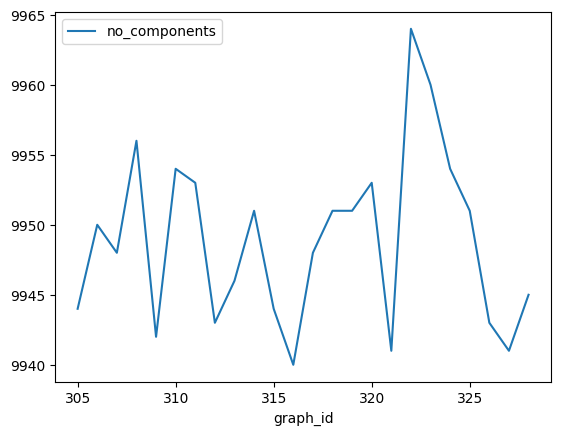

In [81]:
components.plot.line(x="graph_id", y="no_components")

In [91]:
measures_size_greatest_cc = []
for i in range(305, 329):
    G = nx.read_graphml(f"/datos/EpiTeam/redes/year=2020/month=02/day=04/04_02_2020_SEED_{i}.graphml")
    largest_cc = max(nx.connected_components(G), key=len)
    measures_size_greatest_cc.append((i, len(largest_cc))) 

In [93]:
largest_cc_pdf = pd.DataFrame(measures_size_greatest_cc, columns=["graph_id", "component_size"])

In [94]:
largest_cc_pdf

,graph_id,component_size
0,305,5
1,306,5
2,307,5
3,308,4
4,309,7
5,310,6
6,311,6
7,312,5
8,313,8
9,314,5


<AxesSubplot: xlabel='graph_id'>

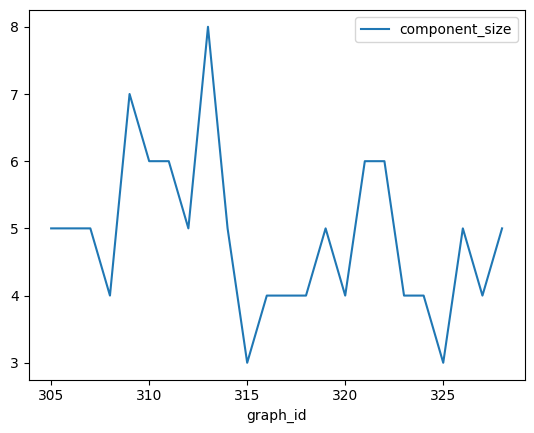

In [95]:
largest_cc_pdf.plot.line(x="graph_id", y="component_size")

<AxesSubplot: xlabel='graph_id'>

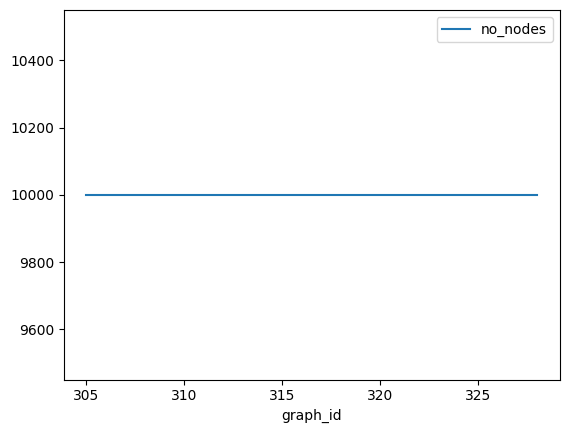

In [99]:
no_nodes_m = []
for i in range(305, 329):
    G = nx.read_graphml(f"/datos/EpiTeam/redes/year=2020/month=02/day=04/04_02_2020_SEED_{i}.graphml")
    no_nodes_m.append((i, G.number_of_nodes()))

no_nodes_pdf = pd.DataFrame(no_nodes_m, columns=["graph_id", "no_nodes"])

no_nodes_pdf.plot.line(x="graph_id", y="no_nodes")

